In [1]:

'''#### EXERCÍCIO 2 #### '''

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.interpolate import CubicSpline
from scipy.misc import derivative

In [2]:

#----> TABELA <----#
H = np.array((0, 68, 135, 203, 271, 338, 406, 474, 542, 609, 1100, 1500, 2500, 4000, 5000, 9000, 12000, 20000, 25000))
B = np.array((0, 0.733, 1.205, 1.424, 1.517, 1.560, 1.588, 1.617, 1.631, 1.646, 1.689, 1.703, 1.724, 1.731, 1.738, 1.761, 1.77, 1.8, 1.816))


In [3]:

#----> CONSTANTES <----#
numPontos = 100

N1 = 1000      #N° espiras da bobina 1
N2 = 2000      #N° espiras da bobina 2
Ac = 2e-4      #Área do núcleo
Lc = 30e-2     #Comprimento do núcleo
f = 60         #Frequência
w = 2*np.pi*f  #Frequência angular
R = (2, 2e3)   #Resitência da carga
V1_ef = (30, 90) #Tensão RMS


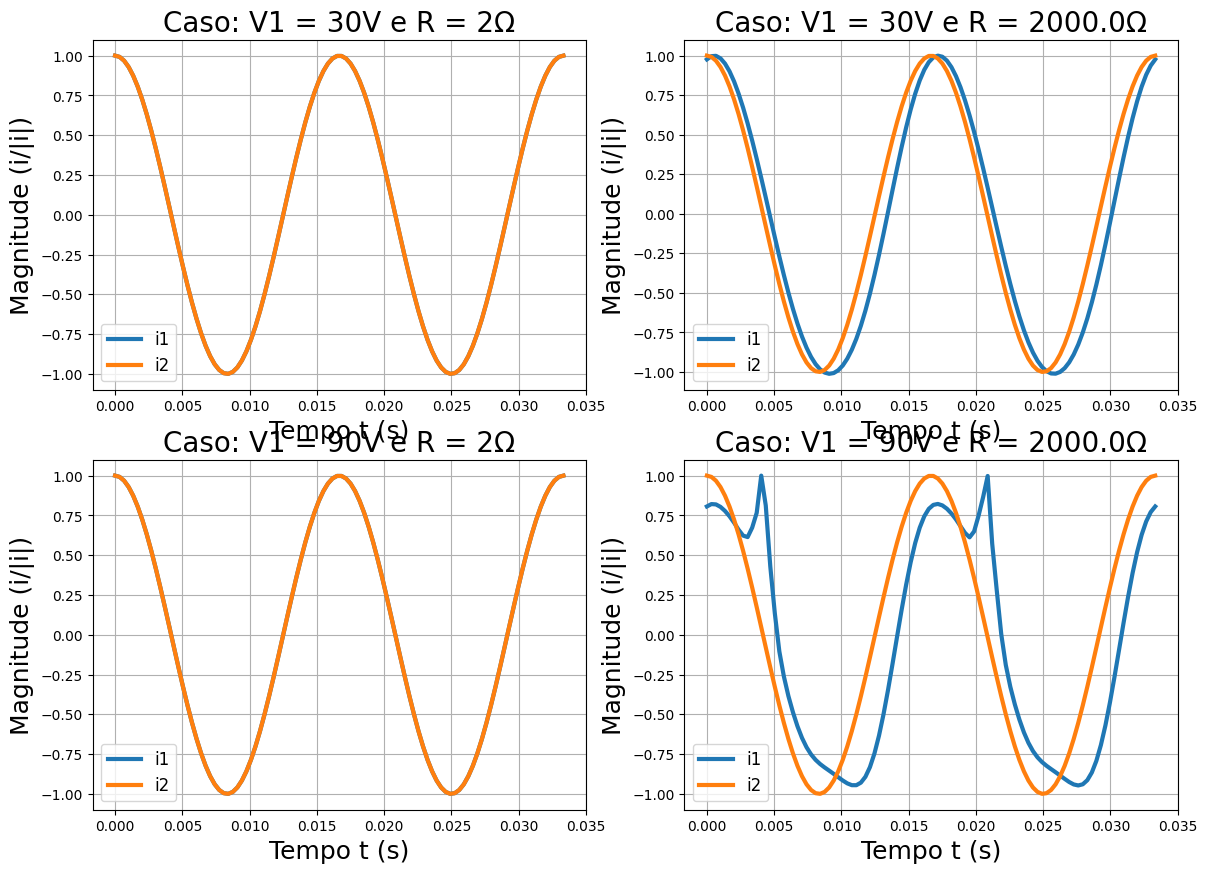

In [4]:

'''
#-------------------------------#
#--------> PARTE ÚNICA <--------#
#-> Determinando as correntes <-#
#-------------------------------#
'''

#Criando a figura
plt.figure(figsize=(14,10), dpi=100)

#Selecionando a Tensão no primário
for i in range(len(V1_ef)):
  V1_RMS = V1_ef[i]
  V1_pico = V1_RMS*np.sqrt(2)


  #Definindo o intervalo de variação de t para 2x o periodo
  t = np.linspace(0, 2/f, numPontos)

  #Tensão no primário em função do tempo
  v1 = V1_pico*np.cos(w*t)

  #Determina o fluxo como a integral da tensão
  lambdaC = V1_pico*np.sin(w*t)/w
  fi = lambdaC/N1

  #Determina a densidade de fluxo
  Bc = fi/Ac

  #Determina a curva H x B para o núcleo real
  curvaHxB = CubicSpline(B,H,)
  Hc = curvaHxB(Bc)


  for j in range(len(R)):
    #Tensão e corrente no secundário
    v2 = (N2/N1)*v1   #Relação de espiras
    i2 = v2/R[j]      #Lei de Ohm


    #Determinando a corrente no primário pela lei de Àmpere
    i1 = (Hc*Lc + N2*i2)/N1

    #Plotando os gráficos
    plt.subplot(2,2, j+1 + i*2)

    plt.plot(t, i1/np.max(i1), label='i1', linewidth=3)
    plt.plot(t, i2/np.max(i2), label='i2', linewidth=3)
    plt.title(f'Caso: V1 = {V1_ef[i]}V e R = {R[j]}Ω', fontsize=20)
    plt.legend(fontsize=12)
    plt.xlabel('Tempo t (s)', fontsize=18)
    plt.ylabel('Magnitude (i/|i|)', fontsize=18)
    plt.grid()
